In [2]:
import random
import time
import numpy as np
import string
import pickle

import sys
import os
from pathlib import Path

root_dir = Path().resolve().parent
sys.path.append(root_dir)
sys.path.append(os.path.join(root_dir, 'src'))

print(root_dir)
print(sys.path)

path2 = lambda x: os.path.join(root_dir, x)

from generate_dictionary import TrieNode
from solve import score

C:\Users\jonlu\VSCodeProjects\word_hunt_tools
['c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311', '', 'c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32', 'c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\jonlu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin', WindowsPath('C:/Users/jonlu/VSCodeProjects/word_hunt_tools'), 'C:\\Users\\jonlu\\VSCodeProjects\\word_hunt_tools\\src', WindowsPath('C:/Users/jonlu/VSCodeProjects/word_hunt_tools'), 'C:\\Users\\jonlu\\VSCodeProjects\\word_hunt_tools\\src']


In [3]:
# get letter frequency of word_list
# in word hunt, 5-7 letter words make up most points
from collections import Counter

WORD_LIST_PATH = "words/Collins Scrabble Words (2019).txt"
with open(path2(WORD_LIST_PATH), "r") as f:
    word_list = f.read().splitlines()
    word_list = [word.upper() for word in word_list]
all_5_7_letter_words = "".join([word for word in word_list if 5 <= len(word) <= 7])
letter_freq = Counter(all_5_7_letter_words)
total_letters = sum(letter_freq.values())
letter_p = np.array([letter_freq[letter] / total_letters for letter in string.ascii_uppercase])

print(np.concatenate([np.array(list(string.ascii_uppercase)).reshape(-1, 1), letter_p.reshape(-1, 1)], axis=1))

PICKLE_FILE = "words/trie.pkl"
#load trie
with open(path2(PICKLE_FILE), 'rb') as f:
    dictionary = pickle.load(f)

[['A' '0.08352425967184723']
 ['B' '0.02358992630544005']
 ['C' '0.03359100872247729']
 ['D' '0.04132127039679605']
 ['E' '0.11670034186338094']
 ['F' '0.015108737811533154']
 ['G' '0.0302287508005376']
 ['H' '0.025373659381398662']
 ['I' '0.07103136303365415']
 ['J' '0.0033667679929282085']
 ['K' '0.017014242804181737']
 ['L' '0.05274528021071052']
 ['M' '0.029421448093592994']
 ['N' '0.055990276286948755']
 ['O' '0.0613910862956983']
 ['P' '0.029522924690834635']
 ['Q' '0.0017341222950849246']
 ['R' '0.06993541578344444']
 ['S' '0.09505876622498038']
 ['T' '0.05403065044243796']
 ['U' '0.038322073189432']
 ['V' '0.009236625384483551']
 ['W' '0.012689084726193591']
 ['X' '0.0033058820345832243']
 ['Y' '0.020200607957569252']
 ['Z' '0.005565427599830421']]


In [4]:
def generate_random_letter():
    return string.ascii_uppercase[np.random.choice(len(string.ascii_uppercase), p=letter_p)]

def generate_random_boards(n):
    return np.array([[[generate_random_letter() for _ in range(4)] for _ in range(4)] for _ in range(n)])

In [5]:
num_boards = 200000

boards = generate_random_boards(num_boards)
scores = np.zeros((num_boards, ))

start_time = time.time()
for i, board in enumerate(boards):
    scores[i] = score(board, dictionary)
end_time = time.time()
print(f"total time: {end_time - start_time:.4f}s")

total time: 869.6559s


In [7]:
#sort boards by score and write top 1000 to file
sorted_indices = np.argsort(scores)[::-1]
top_1000_boards = boards[sorted_indices][:1000]
top_1000_scores = scores[sorted_indices][:1000]

#write results to file
with open(path2("score_boards/boards.txt"), 'wb') as f:
    for board, score in zip(top_1000_boards, top_1000_scores):
        for row in board:
            f.write("".join(row).encode())
            f.write(b"\n")
        f.write(f"{score}\n".encode())
        f.write(b"\n")

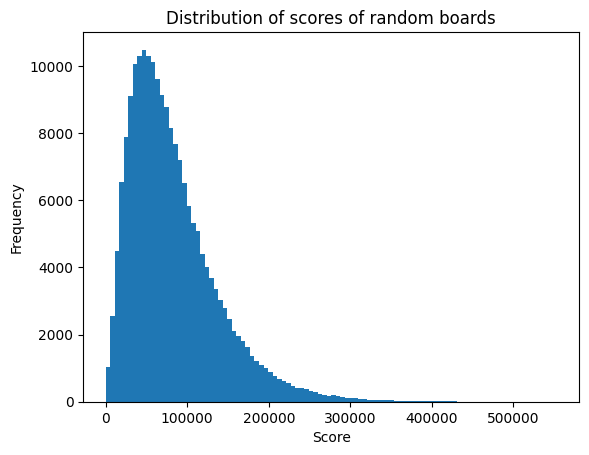

In [12]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=100)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of scores of random boards")
plt.show()